In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
cars = pd.read_csv('Cars.csv')

In [3]:
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [5]:
# check for missing values
cars.isna().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

Correlation matrix

In [6]:
cars.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


 Scatterplot between variables along with histograms

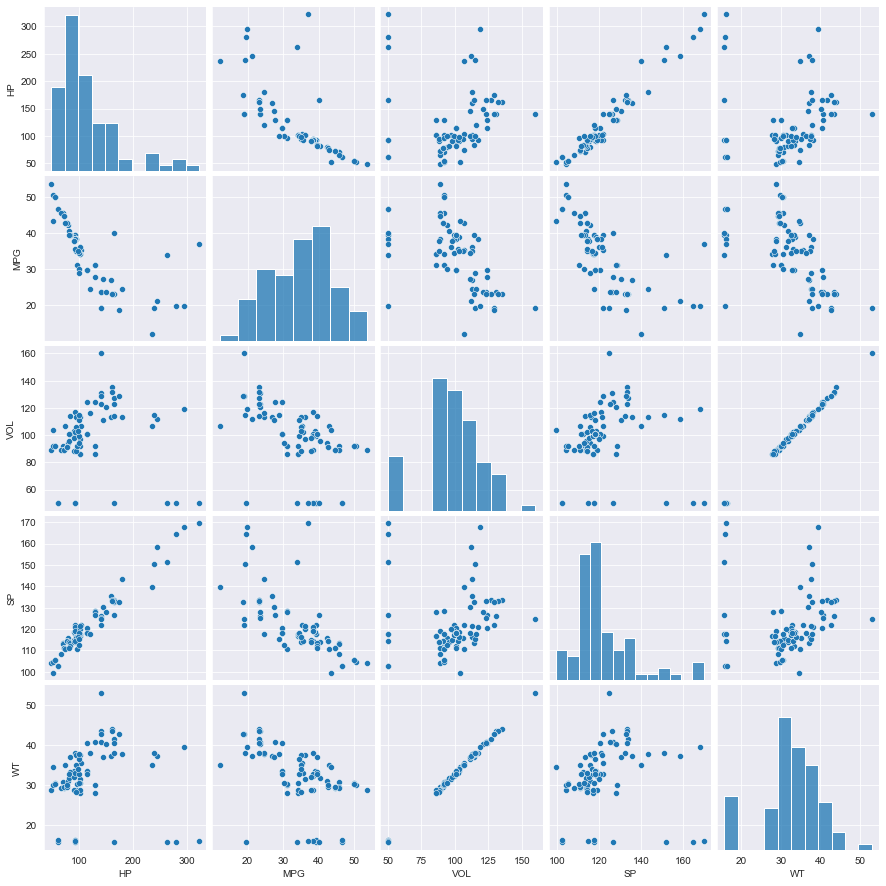

In [7]:
sns.set_style(style = 'darkgrid')
sns.pairplot(cars)

Preparing Model

In [8]:
import statsmodels.formula.api as smf
model = smf.ols('MPG~WT+VOL+SP+HP',data = cars).fit()

In [9]:
# summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Wed, 03 Nov 2021   Prob (F-statistic):           1.54e-23
Time:                        00:38:36   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.043       1.001      60.354
WT             0.4006      1.693      0.237      0.814      -2.972       3.773
VOL           -0.3361      0.569     -0.591      0.556      -1.469       0.796
SP             0.3956      0.158      2.500      0.015       0.080       0.711
HP            -0.2054      0.039     -5.239      0.000      -0.284      -0.127
==============================================================================
Omnibus:                       10.780   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.722
Skew:                           0.707   Prob(JB):                      0.00285
Kurtosis:                       4.215   Cond. No.                     6.09e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Simple Linear Regression Models

In [13]:
ml_v = smf.ols('MPG~VOL',data = cars).fit()
# t and p-values
print(ml_v.tvalues,'\n',ml_v.pvalues)

Intercept    14.106056
VOL          -5.541400
dtype: float64 
 Intercept    2.753815e-23
VOL          3.822819e-07
dtype: float64


In [12]:
ml_w = smf.ols('MPG~WT',data = cars).fit()
# t and p-values
print(ml_w.tvalues,'\n',ml_w.pvalues)

Intercept    14.248923
WT           -5.508067
dtype: float64 
 Intercept    1.550788e-23
WT           4.383467e-07
dtype: float64


In [14]:
ml_wv = smf.ols('MPG~WT+VOL',data = cars).fit()
print(ml_wv.tvalues,'\n',ml_wv.pvalues)

Intercept    12.545736
WT            0.489876
VOL          -0.709604
dtype: float64 
 Intercept    2.141975e-20
WT           6.255966e-01
VOL          4.800657e-01
dtype: float64


Calculating VIF

In [15]:
rsq_hp = smf.ols('HP~WT+VOL+SP',data = cars).fit().rsquared
vif_hp = 1 / (1 - rsq_hp)

In [16]:
rsq_wt = smf.ols('WT~HP+VOL+SP',data = cars).fit().rsquared
vif_wt = 1 / (1 - rsq_wt)

In [17]:
rsq_vol = smf.ols('VOL~WT+HP+SP',data = cars).fit().rsquared
vif_vol = 1 / (1 - rsq_vol)

In [18]:
rsq_sp = smf.ols('SP~WT+VOL+HP',data=cars).fit().rsquared  
vif_sp = 1/(1-rsq_sp) #  16.35

# Storing vif values in a data frame
d1 = {'Variables':['Hp','WT','VOL','SP'],'VIF':[vif_hp,vif_wt,vif_vol,vif_sp]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Hp,19.926589
1,WT,639.533818
2,VOL,638.806084
3,SP,20.007639


Residual Analysis

Test for Normality of Residuals(Q-Q Plot)

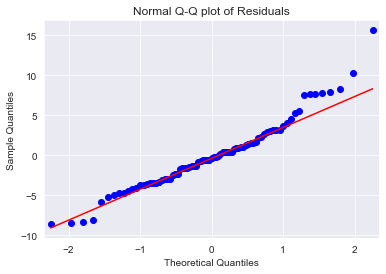

In [19]:
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid,line = 'q')
plt.title('Normal Q-Q plot of Residuals')
plt.show()

In [20]:
list(np.where(model.resid > 10))

[array([ 0, 76], dtype=int64)]

Residual Plot for Homoscedasticity

In [21]:
def get_standardized_values(vals):
    return (vals - vals.mean())/vals.std()

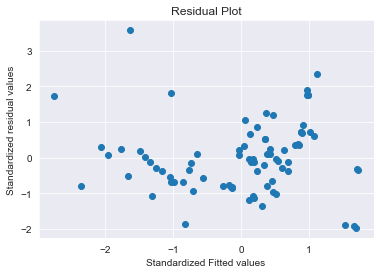

In [22]:
plt.scatter(get_standardized_values(model.fittedvalues),
           get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

Residual Vs Regressors

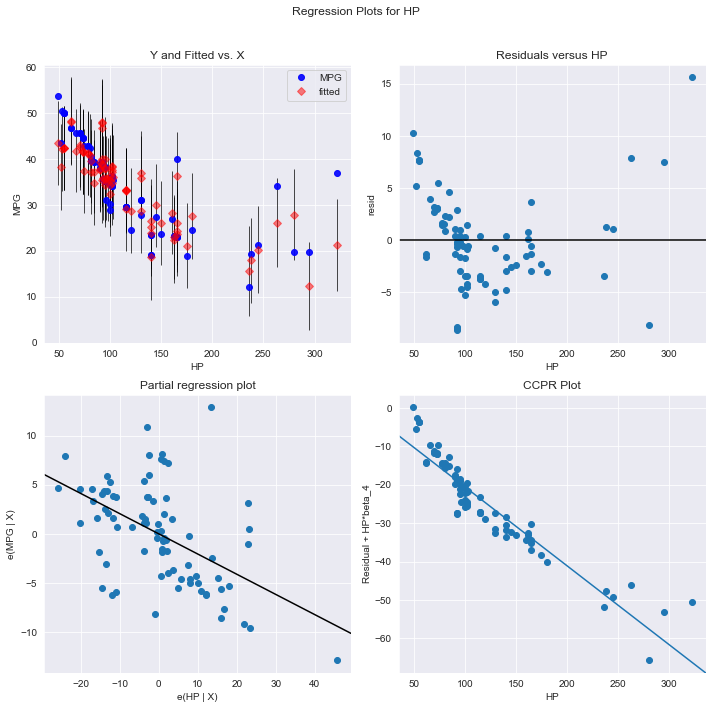

In [23]:
fig = plt.figure(figsize = (10,10))
fig = sm.graphics.plot_regress_exog(model, 'HP', fig = fig)
plt.show()

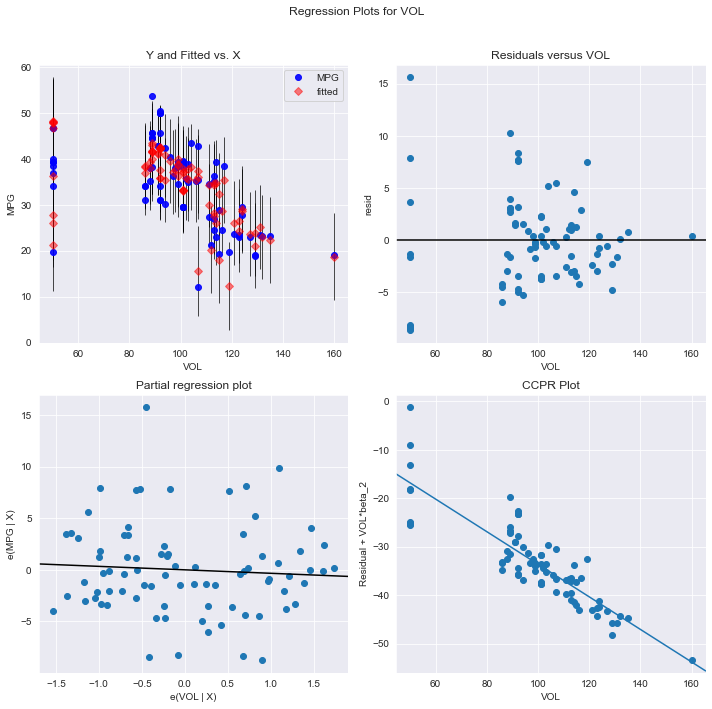

In [24]:
fig = plt.figure(figsize = (10,10))
fig = sm.graphics.plot_regress_exog(model, 'VOL', fig = fig)
plt.show()

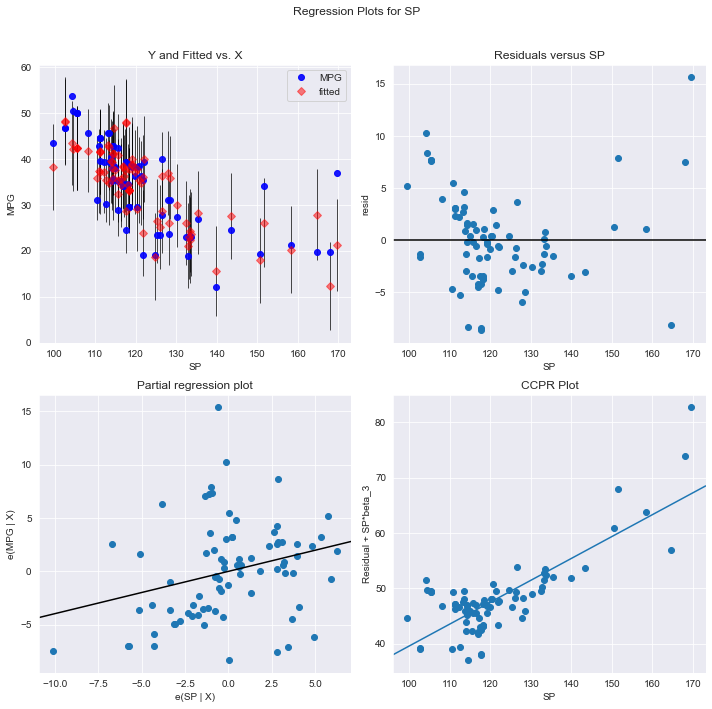

In [25]:
fig = plt.figure(figsize = (10,10))
fig = sm.graphics.plot_regress_exog(model, 'SP', fig = fig)
plt.show()

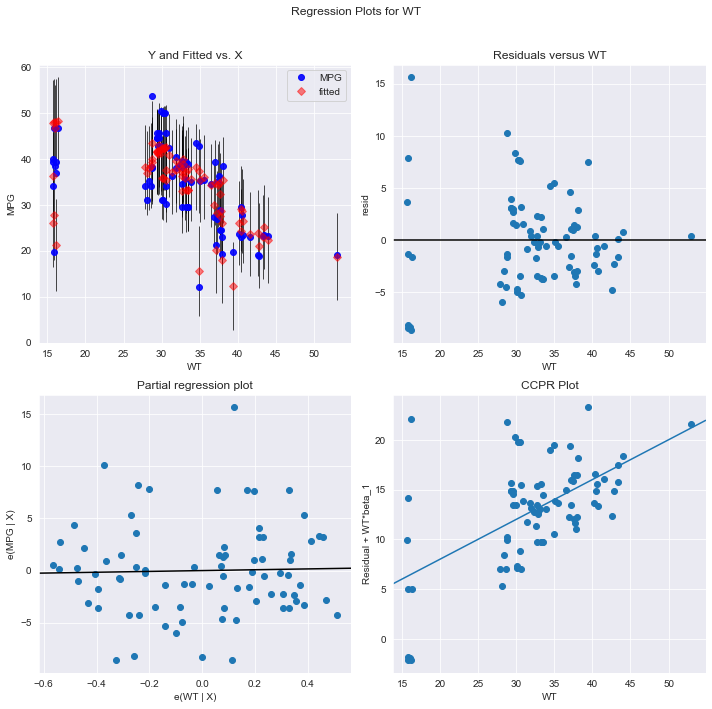

In [26]:
fig = plt.figure(figsize = (10,10))
fig = sm.graphics.plot_regress_exog(model, 'WT', fig = fig)
plt.show()

Model Deletion Diagnostics

Detecting Influencers / Outliers

Cook's Distance

In [27]:
model_influence = model.get_influence()
(c,_) = model_influence.cooks_distance

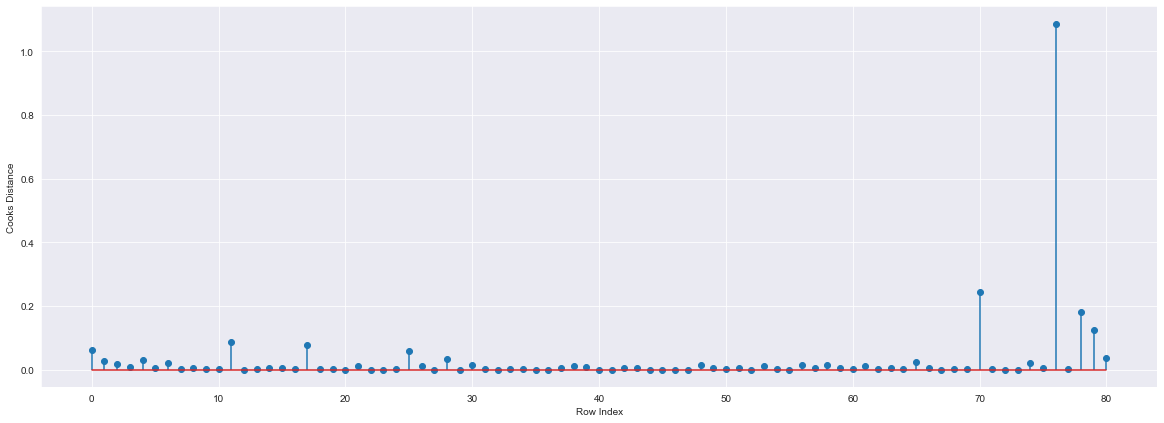

In [28]:
# plot the influencers values using stem plot
fig = plt.subplots(figsize = (20, 7))
plt.stem(np.arange(len(cars)),np.round(c, 3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [29]:
# index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(76, 1.0865193998179823)

High Influence Points

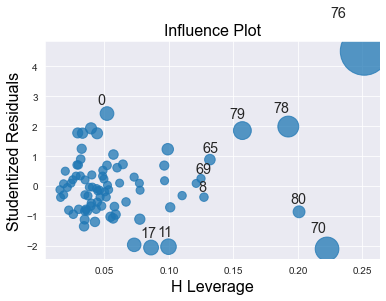

In [30]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [31]:
k = cars.shape[1]
n = cars.shape[0]
leverage_cutoff = 3*((k + 1)/n)

From the above plot, it is evident that data point 70 and 76 are the influencers

In [32]:
cars[cars.index.isin([70,76])]

,HP,MPG,VOL,SP,WT
70,280,19.678507,50,164.598513,15.823060
76,322,36.900000,50,169.598513,16.132947


In [33]:
# See the difference in HP and other variable values
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


Improving the Model

In [34]:
# load the data
cars_new = pd.read_csv('Cars.csv')

In [35]:
# Discard the data points which are influencers and reasign the row number
car1 = cars_new.drop(cars_new.index[[70,76]], axis = 0).reset_index()

In [36]:
# Drop the Original Index
car1 = car1.drop(['index'],axis = 1)

In [37]:
car1

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113
76,263,34.000000,50,151.598513,15.769625
77,295,19.833733,119,167.944460,39.423099


Build Model

In [38]:
# Exclude variable 'WT' and generate R-Squared and AIC values
final_ml_v = smf.ols('MPG~VOL+SP+HP',data = car1).fit()

In [39]:
(final_ml_v.rsquared,final_ml_v.aic)

(0.8161692010376007, 446.1172263944772)

In [40]:
# Exclude variable 'VOL' and generate R-Squared and AIC values
final_ml_w = smf.ols('MPG~WT+SP+HP',data = car1).fit()

In [41]:
(final_ml_w.rsquared,final_ml_w.aic)

(0.8160034320495304, 446.1884323575032)

Cook's Distance

In [42]:
model_influence_v = final_ml_v.get_influence()
(c_v,_) = model_influence_v.cooks_distance

Text(0, 0.5, 'Cooks Distance')

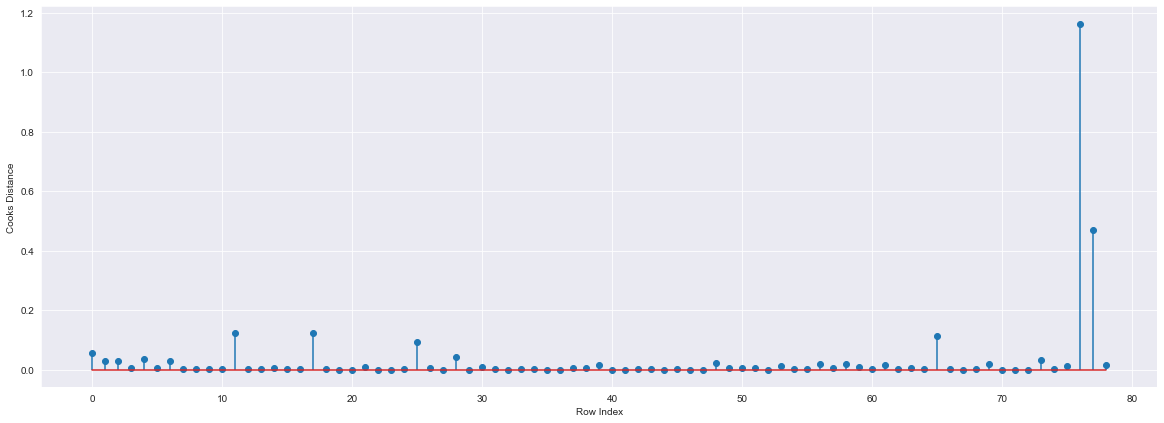

In [43]:
fig = plt.subplots(figsize = (20, 7))
plt.stem(np.arange(len(car1)),np.round(c_v, 3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')

In [44]:
# index of the data points where c is more than .5
(np.argmax(c_v),np.max(c_v))

(76, 1.1629387469135357)

In [45]:
# Drop 76 and 77 observations
car2 = car1.drop(car1.index[[76,77]],axis = 0)

In [46]:
car2

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
72,140,19.086341,160,124.715241,52.997752
73,140,19.086341,129,121.864163,42.618698
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113


In [47]:
# Reset the index and rearange the row values
car3 = car2.reset_index()

In [48]:
car4 = car3.drop(['index'],axis = 1)

In [49]:
car4

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
72,140,19.086341,160,124.715241,52.997752
73,140,19.086341,129,121.864163,42.618698
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113


In [50]:
# Build the model on new data
final_ml_v = smf.ols('MPG~VOL+SP+HP',data = car4).fit()

In [51]:
# Again check for influencers
model_influence_v = final_ml_v.get_influence()
(c_v,_) = model_influence_v.cooks_distance

Text(0, 0.5, 'Cooks Distance')

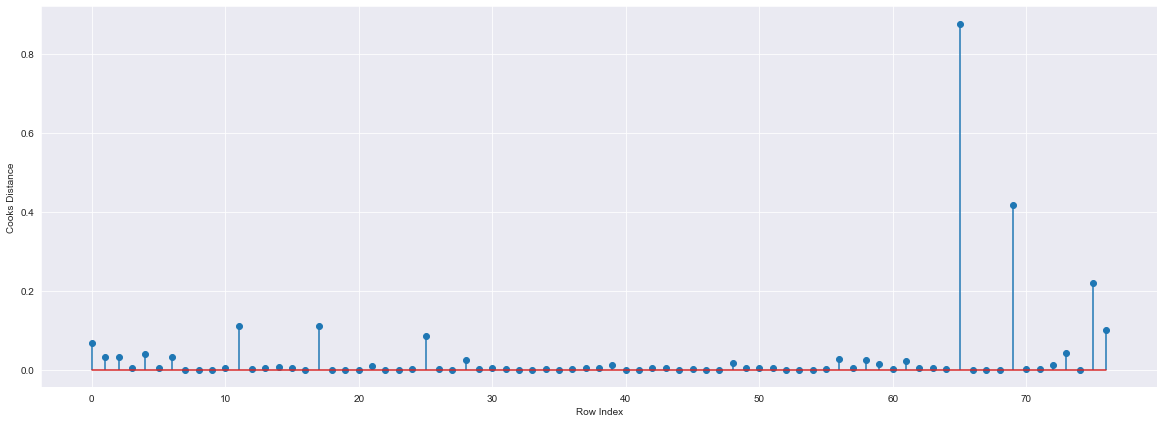

In [52]:
fig = plt.subplots(figsize = (20,7))
plt.stem(np.arange(len(car4)),np.round(c_v,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')

In [53]:
# index of the data points where c is more than .5
(np.argmax(c_v),np.max(c_v))

(65, 0.8774556986296798)

In [54]:
# check the accuracy of the mode
final_ml_v = smf.ols('MPG~VOL+SP+HP',data = car4).fit()

In [55]:
(final_ml_v.rsquared,final_ml_v.aic)

(0.8669636111859063, 409.41530627195084)

Predicting for new Data

In [56]:
# New data for Prediction
new_data = pd.DataFrame({
    'HP' : 40,
    'VOL' : 95,
    'SP' : 102,
    'WT' : 35
},index = [1])

In [57]:
final_ml_v.predict(new_data)

1    46.035594
dtype: float64

In [58]:
final_ml_v.predict(cars_new.iloc[0:5,])

0    45.428872
1    43.992392
2    43.992392
3    43.508150
4    44.085858
dtype: float64

In [59]:
pred_y = final_ml_v.predict(cars_new)

In [60]:
pred_y

0     45.428872
1     43.992392
2     43.992392
3     43.508150
4     44.085858
        ...    
76     7.165876
77    12.198598
78    14.908588
79     4.163958
80     9.161202
Length: 81, dtype: float64